## Using `ipywidgets` for Dynamic Contour Plot Customization

In this notebook, we will learn how to dynamically generate and customize filled contour plots using `matplotlib` and `ipywidgets`. We will focus on plotting a specific mathematical function:

\[
$f(q_1, q_2) = k_1 \cdot q_1^2 + k_2 \cdot q_2^2 + c \cdot q_1 \cdot q_2$
\]

The user will be able to adjust the parameters $k_1$, $k_2$, and $c$, as well as the plot range and number of contours. We'll also add two red arrows to the plot, which are orthogonal and rotated by an angle $\theta$.


### Importing code libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider # import the interact function and the sliders we need for this environemtn

### Defining the Function and Plot Environment

We will define our mathematical function, set up the plot environment, and customize the plot size, axis labels, and other aesthetic features. In this section, we also set the range of the axes and contour properties such as linewidth and color.


In [2]:
def plot_contour(k1=1, k2=1, c=0, theta=0, levels=10):
    # define x,y min, max
    x_min = -5
    x_max = 5
    y_min = -5
    y_max = 5
    
    # Generate the grid
    q1 = np.linspace(x_min, x_max, 400)
    q2 = np.linspace(y_min, y_max, 400)
    Q1, Q2 = np.meshgrid(q1, q2)

    # Define the function
    Z = k1 * Q1**2 + k2 * Q2**2 + c * Q1 * Q2

    # Create the plot
    plt.figure(figsize=(4, 4))
    contour_filled = plt.contourf(Q1, Q2, Z, levels=levels, cmap='viridis')
    contour_lines = plt.contour(Q1, Q2, Z, levels=levels, colors='black', linewidths=0.5)

    # Add labels inline
    # plt.clabel(contour_lines, inline=True, fontsize=8)

    # Set axis labels and range
    plt.xlabel('$q_1$', fontsize=12)
    plt.ylabel('$q_2$', fontsize=12)
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])

    # Superimpose two orthogonal red arrows
    arrow_length = 0.3*(y_max-y_min)  # Set a fixed length for the arrows
    plt.arrow(0, 0, arrow_length * np.cos(2*np.pi*theta/360), arrow_length * np.sin(2*np.pi*theta/360),
              color='red', head_width=0.2)
    plt.arrow(0, 0, -arrow_length * np.sin(2*np.pi*theta/360), arrow_length * np.cos(2*np.pi*theta/360),
              color='red', head_width=0.2)

    # Display the plot
    plt.show()


### Testing our plot function

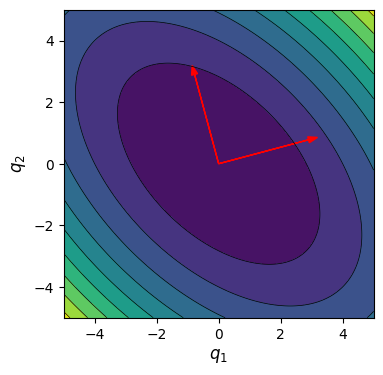

In [3]:
plot_contour(1, 1, 1, 15, levels=10) # theta = 15 degrees

### Introduction to `ipywidgets`

The `ipywidgets` library allows us to create interactive widgets for user control in Jupyter notebooks. Using `interact`, we can create dynamic sliders to change the values of parameters and observe how the plot responds to different settings in real-time.

Next, we will apply these sliders to control the parameters $k_1$, $k_2$, and $c$, along with the angle $\theta$ of the arrows and the range of the plot.


In [4]:
interact(plot_contour,
         k1=FloatSlider(min=-2, max=2, step=0.1, value=1, description='k1'),
         k2=FloatSlider(min=-2, max=2, step=0.1, value=1, description='k2'),
         c=FloatSlider(min=-2, max=2, step=0.1, value=0, description='c'),
         theta=FloatSlider(min=0, max=360, step=1, value=0, description='Theta'),
         levels=IntSlider(min=5, max=20, step=1, value=10, description='Levels')       
        )

plt.show()

interactive(children=(FloatSlider(value=1.0, description='k1', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…